In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

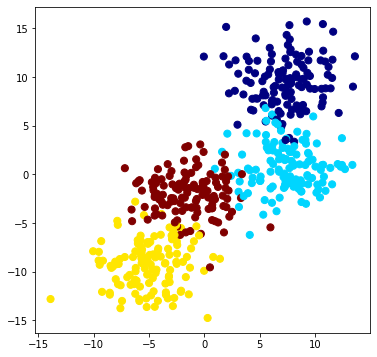

In [3]:
from sklearn.datasets import make_blobs

X,Y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='jet')

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
def visualize_tree(classifier, X, Y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, Y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, Y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

C:\Users\annau\AppData\Local\Temp/ipykernel_8704/879565705.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


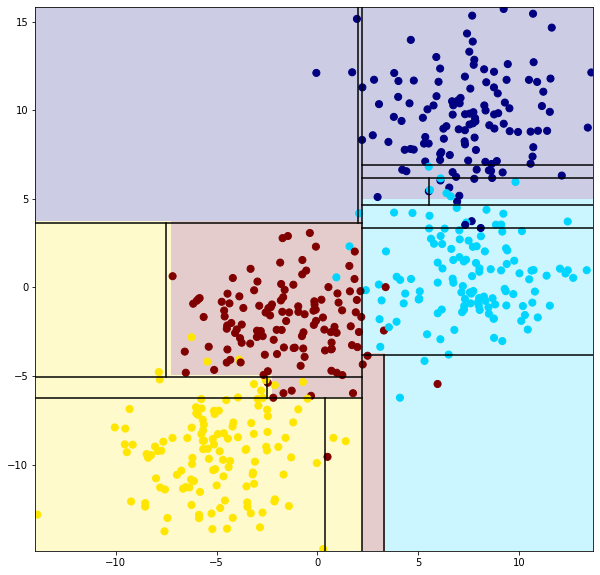

In [6]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

visualize_tree(clf,X,Y)

C:\Users\annau\AppData\Local\Temp/ipykernel_8704/879565705.py:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


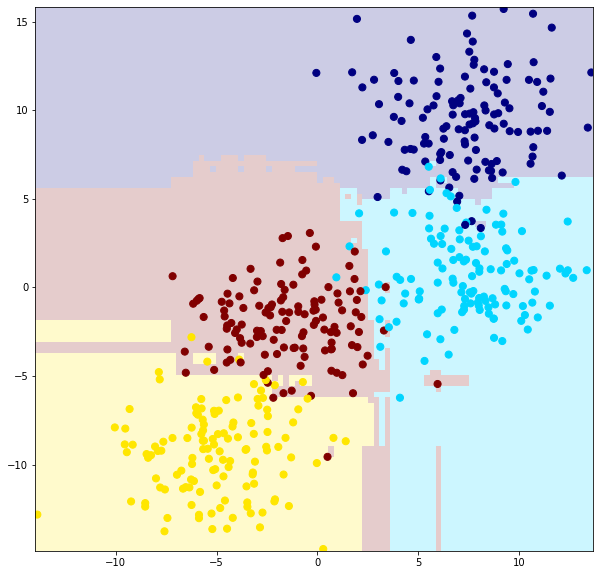

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

visualize_tree(clf,X,Y,boundaries=False)

In [8]:
x = 10 * np.random.rand(100)

In [9]:
x

array([0.38312875, 5.00674263, 2.65219495, 3.98821981, 7.91404469,
       1.09221736, 4.40444304, 2.507204  , 6.48014652, 6.40384015,
       4.28540016, 5.16837099, 9.23504256, 3.06026443, 4.60464819,
       4.49682559, 0.4751254 , 3.61599818, 6.64187768, 0.43064247,
       8.77566645, 0.11996035, 5.91442499, 3.19924485, 1.66527949,
       7.70829194, 3.40180458, 8.56295645, 9.73081028, 2.14183618,
       8.86100401, 5.20253095, 7.48165362, 9.54767473, 5.19580855,
       8.21177439, 2.83993351, 5.06250039, 9.69481375, 4.9550548 ,
       4.25340252, 9.364558  , 6.44186182, 9.0792286 , 6.13844171,
       3.10528117, 0.26090449, 6.17769443, 6.19786017, 7.0484214 ,
       6.63759615, 8.11263718, 2.06584978, 5.31041989, 5.99099624,
       8.51283068, 4.6152982 , 3.05809951, 2.44239058, 9.6341272 ,
       9.00501573, 8.57011477, 4.6859025 , 1.80310152, 3.80972531,
       0.05924324, 5.95451736, 3.37225616, 4.94621578, 4.13127655,
       8.56806148, 1.48485242, 5.18920535, 5.26900968, 9.46425

In [10]:
def sin_model(x,sigma=0.2):
    
    noise = sigma * np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.5*x) + noise

In [11]:
y = sin_model(x)

<ErrorbarContainer object of 3 artists>

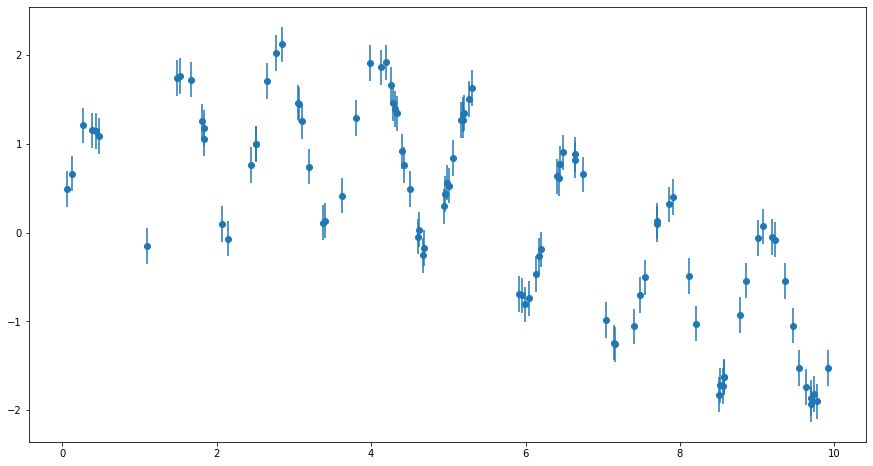

In [15]:
plt.figure(figsize=(15,8))
plt.errorbar(x,y,0.2,fmt='o')

In [13]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,1000)



In [14]:
rfr = RandomForestRegressor(100)

rfr.fit(x[:,None],y)

yfit = rfr.predict(xfit[:,None])

In [16]:
ytrue = sin_model(xfit,0)

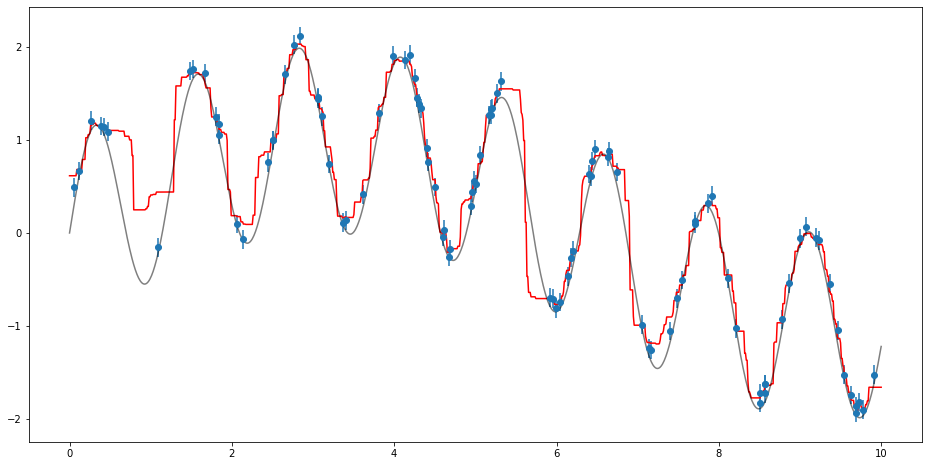

In [19]:
plt.figure(figsize=(16,8))

plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit, '-r')
plt.plot(xfit,ytrue, '-k',alpha=0.5)